In [1]:
!pip install ultralytics
!pip install roboflow

In [2]:
%load_ext autoreload
%autoreload 2

import ultralytics
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow

In [3]:
# Important Constants
API_KEY = ""
# Please update the model config file
MODEL_CONFIG = "bounding-box-model-config.yml"
EPOCHS=150
EXAMPLE_IMAGE_PATH = "License-Plates-5/test/images/b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg"

In [4]:
# Please insert API Key
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("samrat-sahoo").project("license-plates-f8vsn")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to License-Plates-5 in yolov8:: 100%|██████████| 2180/2180 [00:00<00:00, 4955.97it/s]


In [5]:
model = ultralytics.YOLO("yolov8n.pt")

In [6]:
model.train(data=MODEL_CONFIG, epochs=EPOCHS)

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=bounding-box-model-config.yml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e15b00d7b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

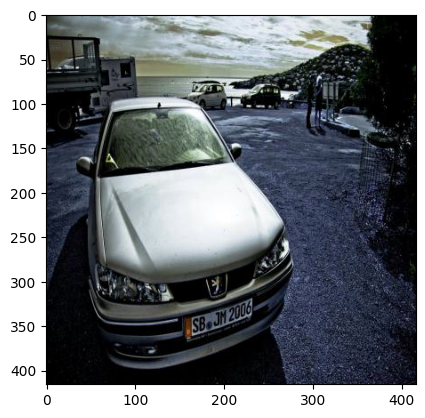

In [7]:
img = cv2.imread(EXAMPLE_IMAGE_PATH)
plt.imshow(img)


0: 640x640 1 license-plate, 3 vehicles, 12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


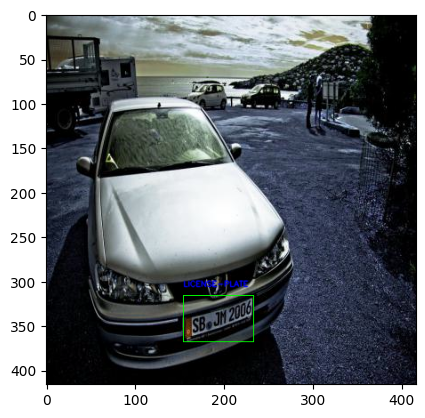

In [8]:
results = model(img)[0]
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if class_id == 0:
      region = img[int(y1):int(y2), int(x1):int(x2)]

      cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 1)
      cv2.putText(img, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                  cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255), 1, cv2.LINE_AA)
      plt.imshow(img)

In [9]:
model.export()

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

TorchScript: starting export with torch 2.1.0+cu118...
TorchScript: export success ✅ 2.5s, saved as 'runs/detect/train2/weights/best.torchscript' (11.9 MB)

Export complete (4.2s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640 data=bounding-box-model-config.yml  
Visualize:       https://netron.app


'runs/detect/train2/weights/best.torchscript'